<a href="https://colab.research.google.com/github/BrandonKTC/Pytorch_Deep_learning/blob/main/02_Pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network classification with PyTorch

In [42]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

len(X), len(y)

(1000, 1000)

## Check input and output shape

In [2]:
print(X[:5])
print(y[:5])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
[1 1 1 1 0]


In [3]:
import pandas as pd

circles = pd.DataFrame(X, y)
circles.head()

,0,1
1,0.754246,0.231481
1,-0.756159,0.153259
1,-0.815392,0.173282
1,-0.393731,0.692883
0,0.442208,-0.896723


## Experiment on a Toy Datasets

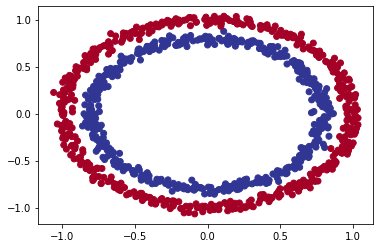

In [4]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [5]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

len(X), len(y)

(1000, 1000)

In [2]:
def accuracy_fn(y_true, y_pred):
  """
  return the accuracy of the model
  """
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_true)) * 100
  return acc

In [43]:
import torch
from sklearn.model_selection import train_test_split
import torch.nn as nn
# Turn data into tensors and create train and test splits

X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [15]:
from torch.nn.modules.linear import Linear
# 1. set up the device
device = "cuda" if torch.cuda.is_available() else "gpu"

# 2. Instantiate the model
model_0 = nn.Sequential(
    nn.Linear(2, 5),
    nn.Linear(5, 1)
).to(device)
model_0

BinaryClassification(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [16]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=1e-3)

In [20]:
model_1.eval()
with torch.inference_mode(): 
  y_logits = model_0(X_test.to(device))
y_logits[:5]

tensor([[ 0.0559],
        [ 0.0161],
        [ 0.0904],
        [ 0.0463],
        [-0.0200]], device='cuda:0')

In [21]:
y_pred_probs = torch.round(torch.sigmoid(y_logits))
y_pred_probs[:5]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]], device='cuda:0')

In [44]:
# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

X_train.device, X_test.device, y_train.device, y_test.device

(device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0))

In [12]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# 3. train model
epochs = 100

for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward Pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitdLoss expects raw logits as input
  acc = accuracy_fn(y_train, y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward()
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing
  model_0.eval()

  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_acc = accuracy_fn(y_test, test_pred)
    test_loss = loss_fn(test_logits, y_test)
  ## Print output
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test Loss: {test_loss:.5f} | Test acc: {test_acc:.2f} ")

Epoch: 0 | Loss: 0.69993, Acc: 50.00 | Test Loss: 0.69990 | Test acc: 50.00 
Epoch: 10 | Loss: 0.69993, Acc: 50.00 | Test Loss: 0.69990 | Test acc: 50.00 
Epoch: 20 | Loss: 0.69992, Acc: 50.00 | Test Loss: 0.69990 | Test acc: 50.00 
Epoch: 30 | Loss: 0.69992, Acc: 50.00 | Test Loss: 0.69990 | Test acc: 50.00 
Epoch: 40 | Loss: 0.69992, Acc: 50.00 | Test Loss: 0.69989 | Test acc: 50.00 
Epoch: 50 | Loss: 0.69991, Acc: 50.00 | Test Loss: 0.69989 | Test acc: 50.00 
Epoch: 60 | Loss: 0.69991, Acc: 50.00 | Test Loss: 0.69989 | Test acc: 50.00 
Epoch: 70 | Loss: 0.69991, Acc: 50.00 | Test Loss: 0.69988 | Test acc: 50.00 
Epoch: 80 | Loss: 0.69990, Acc: 50.00 | Test Loss: 0.69988 | Test acc: 50.00 
Epoch: 90 | Loss: 0.69990, Acc: 50.00 | Test Loss: 0.69988 | Test acc: 50.00 
Epoch: 100 | Loss: 0.69990, Acc: 50.00 | Test Loss: 0.69987 | Test acc: 50.00 
Epoch: 110 | Loss: 0.69989, Acc: 50.00 | Test Loss: 0.69987 | Test acc: 50.00 
Epoch: 120 | Loss: 0.69989, Acc: 50.00 | Test Loss: 0.69987 | T

In [15]:
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
from helper_functions import plot_decision_boundary, plot_predictions

--2022-07-15 09:34:46--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9569 (9.3K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.34K  --.-KB/s    in 0s      

2022-07-15 09:34:47 (67.2 MB/s) - ‘helper_functions.py’ saved [9569/9569]



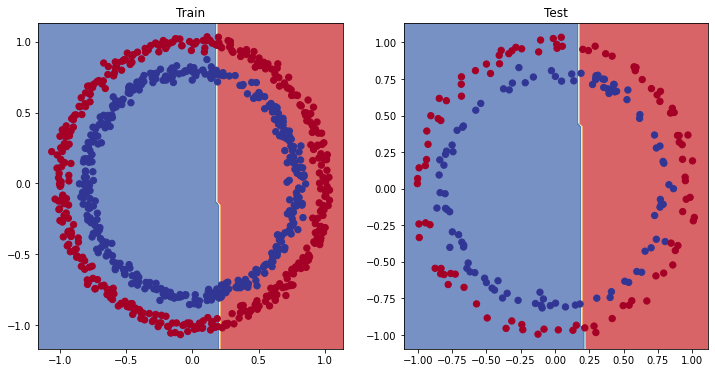

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [38]:
class BinaryClassification(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    # self.two_linear_layers = nn.Sequential(
    #     nn.Linear(in_features=2, out_features=5),
    #     nn.Linear(in_features=5, out_features=1)
    # ).to(device)
    # 3. define the forward
  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))
      # return self.two_linear_layers

model_1 = BinaryClassification().to(device)
model_1

BinaryClassification(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
  # Set the training mode on
  model_1.train()
  # 1. Forward
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  # 2. Calculate loss/Accuracy
  loss = loss_fn(y_pred, y_train)
  acc = accuracy_fn(y_train, y_pred)
  # 3. optimizer zero grad
  optimizer.zero_grad()
  # 4. backward
  loss.backward()
  optimizer.step()
  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate loss/Accuracy
    test_loss = loss_fn(test_pred, y_test)
    test_acc = accuracy_fn(y_test, test_pred)
  # 5. Print result
  if epoch % 10 == 0:
    print(f"Epoch {epoch} | loss: {loss:.5f} | acc: {acc:.2f}% | test_loss: {test_loss:.5f} | test_acc: {test_acc:.2f}% ")



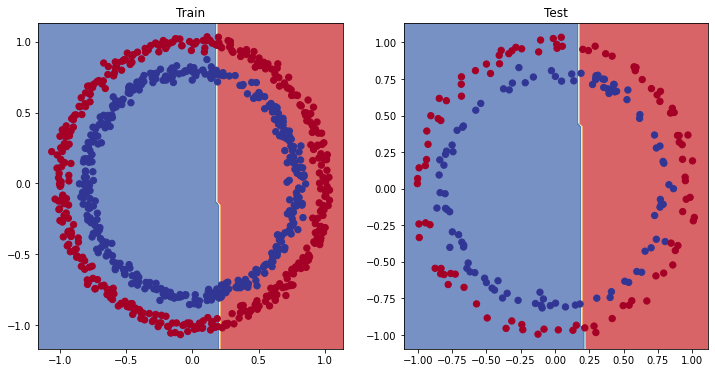

In [35]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [40]:
weight = 0.7
bias = 0.3

X_regression = torch.arange(0, 1, 0.01).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]), tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [61]:
split = int(0.8*len(X_regression))
X_train_regression, y_train_regression = X_regression[:split], y_regression[:split]
X_test_regression, y_test_regression = X_regression[split:], y_regression[split:]

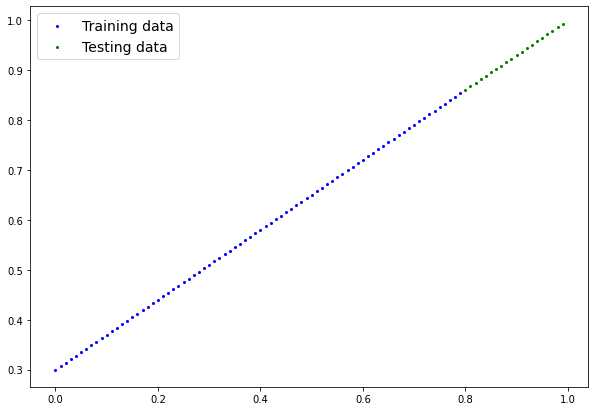

In [46]:
plot_predictions(X_train_regression, y_train_regression,
                 X_test_regression, y_test_regression)

In [62]:
model_2 = nn.Sequential(
    nn.Linear(1, 10),
    nn.Linear(10, 10),
    nn.Linear(10, 1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [63]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr=1e-3)

In [64]:
epochs = 1000

for epoch in range(epochs):
  model_2.train()
  # Forward
  y_pred = model_2(X_train_regression.to(device))
  # loss/Accuracy
  loss = loss_fn(y_pred, y_train_regression.to(device))
  # optimizer
  optimizer.zero_grad()
  # loss
  loss.backward()
  # optimizer
  optimizer.step()
  ### Testing
  model_2.eval()
  # Forward
  test_pred = model_2(X_test_regression.to(device))
  # loss
  test_loss = loss_fn(test_pred, y_test_regression.to(device))
  ### Printing result
  if epoch % 100 == 0:
    print(f"Epoch {epoch} | loss: {loss:.5f} | test_loss: {test_loss:.5f}")

Epoch 0 | loss: 1.04629 | test_loss: 1.42446
Epoch 100 | loss: 0.62494 | test_loss: 0.92747
Epoch 200 | loss: 0.18931 | test_loss: 0.41051
Epoch 300 | loss: 0.07019 | test_loss: 0.17166
Epoch 400 | loss: 0.06253 | test_loss: 0.14542
Epoch 500 | loss: 0.05494 | test_loss: 0.12667
Epoch 600 | loss: 0.04718 | test_loss: 0.10866
Epoch 700 | loss: 0.03921 | test_loss: 0.09035
Epoch 800 | loss: 0.03099 | test_loss: 0.07133
Epoch 900 | loss: 0.02250 | test_loss: 0.05170


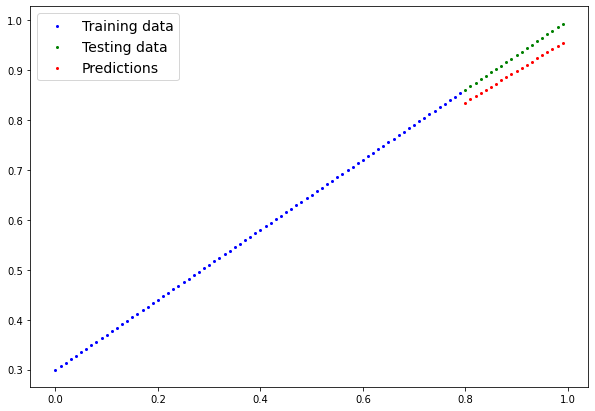

In [66]:
model_2.eval()
with torch.inference_mode():
  y_preds = model_2(X_test_regression.to(device))

plot_predictions(X_train_regression.cpu(), y_train_regression.cpu(),
                 X_test_regression.cpu(), y_test_regression.cpu(),
                 y_preds.cpu())

In [67]:
# Recreate the make circle data
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [68]:
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

device = "cuda" if torch.cuda.is_available() else "cpu"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
import torch
from torch import nn

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(2, 10)
    self.layer_2 = nn.Linear(10, 10)
    self.layer_3 = nn.Linear(10,1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV0().to(device)
model_3

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [100]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

In [95]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [101]:
epochs = 1000

for epoch in range(epochs):
  ## Training
  model_3.train()
  # Forward
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  # Loss/Accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_pred)
  # optimizer
  optimizer.zero_grad()
  # loss
  loss.backward()
  # optimizer
  optimizer.step()

  ## Testing
  model_3.eval()

  with torch.inference_mode():
  # Forward
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # Loss/Accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)
  ## Printing results
  if epoch % 100 == 0:
    print(f"Epoch {epoch} | loss: {loss:.5f} | acc: {acc:.2f}% | test_loss: {test_loss:.5f} | test_acc: {test_acc:.2f}% ")

Epoch 0 | loss: 0.71836 | acc: 50.00% | test_loss: 0.71839 | test_acc: 50.00% 
Epoch 100 | loss: 0.68836 | acc: 54.12% | test_loss: 0.69158 | test_acc: 49.00% 
Epoch 200 | loss: 0.68467 | acc: 55.88% | test_loss: 0.69037 | test_acc: 48.50% 
Epoch 300 | loss: 0.67939 | acc: 60.75% | test_loss: 0.68793 | test_acc: 52.00% 
Epoch 400 | loss: 0.67162 | acc: 64.00% | test_loss: 0.68320 | test_acc: 54.00% 
Epoch 500 | loss: 0.65818 | acc: 64.12% | test_loss: 0.67298 | test_acc: 56.50% 
Epoch 600 | loss: 0.63417 | acc: 74.88% | test_loss: 0.65315 | test_acc: 67.50% 
Epoch 700 | loss: 0.58880 | acc: 85.88% | test_loss: 0.61579 | test_acc: 79.00% 
Epoch 800 | loss: 0.51061 | acc: 92.75% | test_loss: 0.54950 | test_acc: 85.50% 
Epoch 900 | loss: 0.40440 | acc: 95.12% | test_loss: 0.45426 | test_acc: 89.50% 


In [102]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

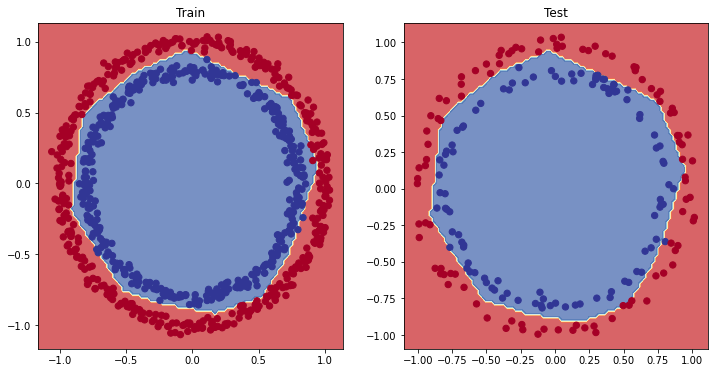

In [103]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

In [104]:
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [105]:
def relu(x):
  return torch.maximum(torch.tensor(0), x)

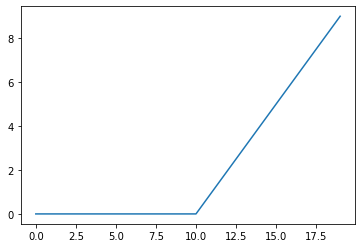

In [106]:
import matplotlib.pyplot as plt

plt.plot(relu(A))

In [109]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

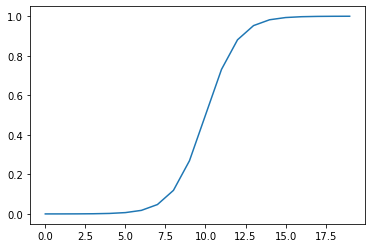

In [110]:
plt.plot(sigmoid(A))

In [1]:
def accuracy_fn(y_true, y_pred):
  """
  return the accuracy of the model
  """
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_true)) * 100
  return acc

# Putting it all together

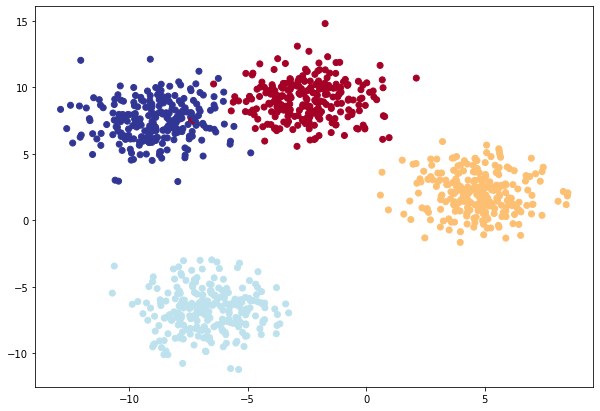

In [27]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set. the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi_class data

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2. Turn data into tensor
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. split into train/test set
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [28]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

# Define the model functional way
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """
    Initializes multi_class classification model.

    Args:
    input_features (int): Number of input features to the model
    output_features (int): Number of outputs features (number of output classes)
    hidden_units (int): Number of hidden units between layers, default 8
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
      nn.Linear(in_features=input_features, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  
  def forward(self,x):
    return self.linear_layer_stack(x)

# Create an instance of the model
model_4 = BlobModel(2, 4).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [29]:
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

In [30]:
# Define loss_fn and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

In [22]:
X_blob_test[:5]

tensor([[ 4.6675,  4.4878],
        [-7.9969,  6.8803],
        [-6.2801, -7.8571],
        [ 3.6833,  1.1767],
        [-0.1404, 10.1654]], device='cuda:0')

In [31]:
# Compile the model
epochs = 100

for epoch in range(epochs):
  model_4.train()
  # Forward
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  # loss/Acc
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_blob_train, y_pred)
  # optimizer
  optimizer.zero_grad()
  # loss
  loss.backward()
  # optimizer
  optimizer.step()
  ## Testing
  model_4.eval()
  with torch.inference_mode():
    # Forward
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # Loss/Acc
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_blob_test, test_pred)
    ### Printing
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} Loss: {loss} | accuracy: {acc} | Test loss: {test_loss:.4f} | test_accuracy : {test_acc:.2f}% ")

Epoch: 0 Loss: 1.375062108039856 | accuracy: 48.75 | Test loss: 1.1580 | test_accuracy : 55.00% 
Epoch: 10 Loss: 0.5697318911552429 | accuracy: 92.0 | Test loss: 0.4742 | test_accuracy : 99.00% 
Epoch: 20 Loss: 0.3082369565963745 | accuracy: 98.125 | Test loss: 0.2452 | test_accuracy : 99.00% 
Epoch: 30 Loss: 0.13681866228580475 | accuracy: 99.125 | Test loss: 0.1102 | test_accuracy : 99.00% 
Epoch: 40 Loss: 0.07877318561077118 | accuracy: 99.125 | Test loss: 0.0649 | test_accuracy : 99.50% 
Epoch: 50 Loss: 0.05859982967376709 | accuracy: 99.125 | Test loss: 0.0475 | test_accuracy : 99.50% 
Epoch: 60 Loss: 0.0487515814602375 | accuracy: 99.125 | Test loss: 0.0386 | test_accuracy : 99.50% 
Epoch: 70 Loss: 0.043023429811000824 | accuracy: 99.125 | Test loss: 0.0333 | test_accuracy : 99.50% 
Epoch: 80 Loss: 0.03931153938174248 | accuracy: 99.125 | Test loss: 0.0297 | test_accuracy : 99.50% 
Epoch: 90 Loss: 0.036728013306856155 | accuracy: 99.125 | Test loss: 0.0272 | test_accuracy : 99.50

In [32]:
model_4.eval()
with torch.inference_mode():
  y_preds = model_4(X_blob_test)

y_pred_probs = y_preds.argmax(dim=1)
y_pred_probs[:10], y_blob_test[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'))

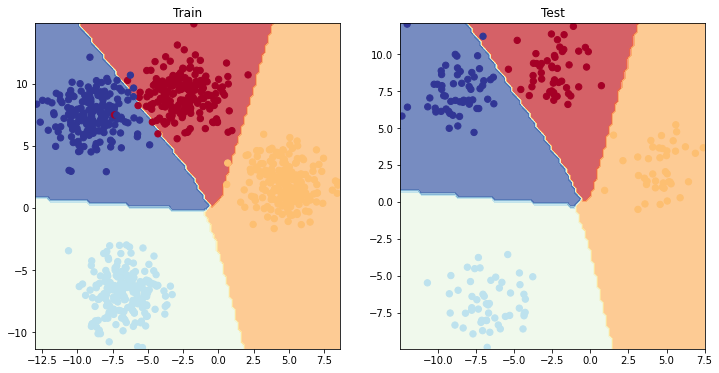

In [33]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_pred_probs.cpu(), y_blob_test.cpu()))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        53
           3       0.98      1.00      0.99        56

    accuracy                           0.99       200
   macro avg       1.00      0.99      1.00       200
weighted avg       1.00      0.99      0.99       200

